# Final Project Report

* Class: DS 5100
* Student Name: Alex Yang
* Student Net ID: zy7ts
* This URL: [Link](https://github.com/alexyang790/ds5100-finalproject-zy7ts/blob/main/ds5100_final_project_files/DS51200_FinalProjectTemplate.ipynb)

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/alexyang790/ds5100-finalproject-zy7ts

```python
import pandas as pd
import numpy as np
class Die():
    """
    The Die() class represents a 'die' that can be rolled and may have different weights on each face

    Attributes:
        faces (np.array): A NumPy array representing the faces of the die.
        __weights (np.array): An array representing the weights assigned to each face.
        __die (pd.DataFrame): A private DataFrame storing faces and their corresponding weights.

    Methods:
        __init__(self, faces: np.ndarray): initilizes the die object with provided faces array  
        changeweight(self, face, new_weight): changes the weight of a specified single face of the die to a provided new weight
        rolldie(self, times=1): rolles the die with provided times (defaults to 1) and returns a list of outcomes (faces)
        printdie(self): returns the die dataframe
    """
    def __init__(self, faces: np.ndarray):
        """
        Initializes a new Die instance with the provided faces array. 

        Inputs:
            faces (np.array): A NumPy array representing the faces of the die.

        Raises:
            TypeError: If faces is not a NumPy array or if it contains data types other than integers or strings.
            ValueError: If the faces array contains non-distinct values.
        """
        self.faces = faces
        #checking if faces is a numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be a numpy array")

        #checking array's data type
        if not (np.issubdtype(faces.dtype, np.integer) or np.issubdtype(faces.dtype, np.str_)):
            raise TypeError("Faces must be a NumPy array of integers or strings.")
                
        #checking if array's values are distinct
        if len(np.unique(faces)) != len(faces):
            raise ValueError("faces must be distinct values")
        
        #internally initializes the weights (private) to 1.0 for each face
        self.__weights = np.ones(len(faces))

        #saving both faces and weights in a private data frame with faces in the index
        self.__die = pd.DataFrame(
            {'faces': self.faces,
            'weight': self.__weights}
        )

    def changeweight(self, face, new_weight):
        """
        Change the weight of a single side of the die.

        Attributes:
            face (int or str): The face value of the side to be changed.
            new_weight (int or float): The new weight for the side.

        Raises:
            IndexError: If the provided face is not in the die array.
            TypeError: If the provided weight is not numeric or not castable as numeric.

        Returns:
            None
        """
        #checking if face is valid i.e. if it is in the die array
        if face not in self.__die['faces'].values:
            raise IndexError('provided face not in die')
        
        #checking if new_weight is valid
        if not isinstance(new_weight, (int, float)):
            raise TypeError('provided weight is not numeric or not castable as numeric')

        #changing the weight
        self.__die.loc[self.__die['faces'] == face, 'weight'] = new_weight

    def rolldie(self, timesrolled = 1):
        """
        A function that simulates rolling a die multiple times and returns the outcomes.

        Attributes:
            self: the object instance
            timesrolled (int): the number of times to roll the die, defaults to 1

        Returns:
            outcomes: list of outcomes from rolling the die
        """
        #checking if timesrolled is an integer
        if type(timesrolled) != int:
            raise TypeError('timesrolled must be an integer')   
        
        #rolling the dice and returning outcome possibility is the weight divided by the sum of the weights
        outcomes = np.random.choice(
            self.__die['faces'], 
            timesrolled,  
            p = self.__die['weight'] /  self.__die['weight'].sum())
        return outcomes
    
    def printdie(self):
        """
        Returns a copy of the private die data frame
        """
        return self.__die


class Game():
    """
    Represents a game where a list of similar dice can be rolled a specified number of times. Their weight can be different
    
    Attributes:
        die_list (list): A list of Die objects representing the dice used in the game.
        __results (pd.DataFrame): A placeholder for the results of the game.

    Methods:
        __init__(self, die_list): Initializes a new instance of the Game class.
        
        play(self, rolled_times): Plays the die in the list a specified number of times and stores the results in a wide data frame.
        
        show_results(self, method="wide"): Displays the results of the most recent play in the specified format ('wide' or 'narrow').
    """
    def __init__(self, die_list):
        """
        Initializes a new instance of the Game class.

        Inputs:
            die_list (list): a list of already instantiated similar dice

        Attributes:
            die_list (list): The list of Die objects representing the dice used in the game.
            play_results (None): A placeholder for the results of the game.
        """
        self.die_list = die_list
        self.__results = None #placeholder for results of the game
        
    def play(self, rolled_times):
        """
        Play the die in the list a specified number of times and store the results in a wide data frame.

        Parameters:
            rolled_times (int): The number of times to roll each die in the list.
       
        Raises:
            TypeError: If the rolled_times parameter is not an integer.
        """
        #checking if rolled_times is an integer
        if not isinstance(rolled_times, int): raise TypeError('rolled_times must be an integer')
        
        #play the die in list and store the results in a data frame
        reults = {i: die.rolldie(rolled_times) for i, die in enumerate(self.die_list)}
        self.__results = pd.DataFrame(reults)

    def show_results(self, method = "wide"):
        """
        A function to display the results of the most recent play in the specified format (wide or narrow, defaults to wide).

        Parameters:
            method (str): The format to return the results in ('wide' or 'narrow'). Defaults to 'wide'.

        Returns:
            pd.DataFrame: The DataFrame containing the results of the most recent play.

        Raises:
            ValueError: If the provided method is not 'wide' or 'narrow'.
        """
        if method == "wide":
            return self.__results
        elif method == 'narrow':
                narrow_results = self.__results.reset_index().melt(id_vars=['index'], var_name='Die', value_name='Outcome')
                narrow_results.set_index(['index', 'Die'], inplace=True)
                narrow_results.index.names = ['Roll Number', 'Die Number']
                return narrow_results
        else:
            raise ValueError("Invalid method specified. Choose 'wide' or 'narrow'.")
    
class Analyzer():
    """
    Represents an analyzer that computes various descriptive statistical properties about the results of a single game.

    Attributes:
        game (Game): An instance of the Game class representing the game being analyzed.
        __results (pd.DataFrame): A DataFrame containing the results of the game.

    Methods:
        __init__(self, game): Initializes a new instance of the Analyzer class.
        
        jackpot(self): Calculates the number of jackpots in the game.
        
        face_counts(self): Calculates the count of each face rolled in each roll of the game.
        
        combo_counts(self): Calculates the distinct combinations of faces rolled in each roll of the game.
        
        permutation_counts(self): Calculates the distinct permutations of faces rolled in each roll of the game.
    """
    def __init__(self, game):
        """
        Initializes a new instance of the Analyzer class.

        Parameters:
            game (Game): An instance of the Game class.

        Raises:
            ValueError: If the game parameter is not an instance of the Game class.

        Returns:
            None
        """
        if not isinstance(game, Game):
            raise ValueError('game must be an instance of Game')
        self.game = game
        self.__results = self.game.show_results(method = 'wide')

    def jackpot(self):
        """
        Calculates the number of jackpots in the game.

        Returns:
            count (int): The number of jackpots.
        """
        count = (self.__results.nunique(axis=1) == 1).sum()
        return count
    
    def face_counts(self):
        """
        Calculates the count of each face rolled in each roll of the game.

        Returns:
            counts_df (pandas.DataFrame): A DataFrame where the index represents the roll number and the columns represent the face values. The values in the DataFrame are the count of each face rolled in each roll.
        """
        #save the result df to a wide table
        wide_format = self.__results.melt(var_name='Die', value_name='Face', ignore_index=False)
        #make a crosstab from the wide table
        counts_df = pd.crosstab(wide_format.index, wide_format['Face'])
        return counts_df

    def combo_counts(self):
        """
        Calculates the distinct combinations of faces rolled in each roll of the game.

        Returns:
            combos_counts (pandas.DataFrame): A DataFrame representing the distinct combinations of faces rolled along with their counts.
        """
        combos = self.__results.apply(lambda x: tuple(x.sort_values().values), axis=1)
        combos_counts = combos.value_counts().reset_index().rename(columns={0: 'count'})
        combos_counts = combos_counts.set_index(list(combos_counts.columns[:-1]))
        return combos_counts

    def permutation_counts(self):
        """
        Calculates the distinct permutations of faces rolled in each roll of the game.

        Returns:
            perm_counts (pandas.DataFrame): A DataFrame representing the distinct permutations of faces rolled along with their counts.
        """
        perms = self.__results.apply(tuple, axis=1)
        perm_counts = perms.value_counts().reset_index().rename(columns={0: 'count'})
        perm_counts = perm_counts.set_index(list(perm_counts.columns[:-1]))
        return perm_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd
import montecarlo as mt

class MonteCarloTest(unittest.TestCase):
    def test_die_init(self):
        """
        A unit test function to test the initialization of a Die object
        """
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        expected_die = pd.DataFrame({
            'faces': [1,2,3,4,5,6],
            'weight': [1.0,1.0,1.0,1.0,1.0,1.0]
        })
        self.assertTrue(die.printdie().equals(expected_die))

    def test_die_changeweight(self):
        """
        A test function to test the change in weight of a Die object.
        """
        #initializing the die
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        #changing the weight
        die.changeweight(2,4)
        #expecting 
        expected_die = pd.DataFrame({
            'faces': [1,2,3,4,5,6],
            'weight': [1.0,4.0,1.0,1.0,1.0,1.0]
        })
        #testing
        self.assertTrue(die.printdie().equals(expected_die))

    def test_die_rolldie(self):
        """
        A test function to test the roll of a Die object.
        """
        #initializing the die
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        #rolling the die
        outcome = len(die.rolldie(3))
        #expecting
        expected = 3
        #testing
        self.assertTrue(np.array_equal(outcome, expected))

    def test_printdie(self):
        """
        A test function to test the return of die's data frame
        """
        #initializing the die
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        #expecting
        expected_df = pd.DataFrame({
            'faces': [1, 2, 3, 4, 5, 6],
            'weight': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
        })
        # Check if the returned DataFrame from printdie() matches the expected DataFrame
        self.assertTrue(die.printdie().equals(expected_df))

    def test_game_init(self):
        """
        A test function to test the initialization of a Game object
        """
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        die_list = [die, die, die]
        game = mt.Game(die_list)
        self.assertTrue(game.die_list == die_list)
    
    def test_game_play(self):
        """
        A test function to test the play of a Game object
        """
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        die_list = [die, die, die]
        game = mt.Game(die_list)
        game.play(4)
        self.assertTrue(game.show_results() is not None)

    def test_game_showresults(self):
        """
        A test function to test the show_results of a Game object
        """
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        die_list = [die, die, die]
        game = mt.Game(die_list)
        game.play(4)
        self.assertTrue(game.show_results(method = 'narrow') is not None)

    def test_analyzer_init(self):
        """
        A test function to test the initialization of an Analyzer object
        """
        array = np.array([1,2,3,4,5,6])
        die = mt.Die(array)
        die_list = [die, die, die]
        game = mt.Game(die_list)
        game.play(4)
        analyzer = mt.Analyzer(game)
        self.assertIsInstance(analyzer.game, mt.Game)

    def test_analyzer_jackpot(self):
        """
        A test function to test the jackpot of an Analyzer object
        """
        #setting up the analyzer instance
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = mt.Die(faces)
        die2 = mt.Die(faces)
        game = mt.Game([die1, die2])
        game.play(rolled_times=10)
        analyzer = mt.Analyzer(game)

        #testing jackpot
        result = analyzer.jackpot()
        self.assertTrue(result >= 0)
       
    def test_analyzer_face_counts(self):
        """
        A test function to test the face_counts of an Analyzer object
        """
        #setting up the analyzer instance
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = mt.Die(faces)
        die2 = mt.Die(faces)
        game = mt.Game([die1, die2])
        game.play(rolled_times=10)
        analyzer = mt.Analyzer(game)

        #testing face_counts
        result = analyzer.face_counts()
        self.assertIsInstance(result, pd.DataFrame, "Face counts should return a DataFrame.")

    def test_analyzer_combo_counts(self):
        """
        A test function to test the combo_counts of an Analyzer object
        """
        #setting up the analyzer instance
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = mt.Die(faces)
        die2 = mt.Die(faces)
        game = mt.Game([die1, die2])
        game.play(rolled_times=10)
        analyzer = mt.Analyzer(game)

        #testing combo_counts
        result = analyzer.combo_counts()
        self.assertIsInstance(result, pd.DataFrame, "Combo counts should return a DataFrame.")
        self.assertIn('count', result.columns, "Combo counts DataFrame should have a 'count' column.")

    def test_analyzer_permutation_counts(self):
        """
        A test function to test the permutation_counts of an Analyzer object
        """
        #setting up the analyzer instance
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = mt.Die(faces)
        die2 = mt.Die(faces)
        game = mt.Game([die1, die2])
        game.play(rolled_times=10)
        analyzer = mt.Analyzer(game)

        #testing permutation_counts
        result = analyzer.permutation_counts()
        self.assertIsInstance(result, pd.DataFrame, "Permutation counts should return a DataFrame.")

if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [46]:
import montecarlo as mt

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [47]:
help(mt)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Represents an analyzer that computes various descriptive statistical properties about the results of a single game.
     |  
     |  Attributes:
     |      game (Game): An instance of the Game class representing the game being analyzed.
     |      __results (pd.DataFrame): A DataFrame containing the results of the game.
     |  
     |  Methods:
     |      __init__(self, game): Initializes a new instance of the Analyzer class.
     |      
     |      jackpot(self): Calculates the number of jackpots in the game.
     |      
     |      face_counts(self): Calculates the count of each face rolled in each roll of the game.
     |      
     |      combo_counts(self): Calculates the distinct combinations of faces rolled in each roll of the game.
     |      
     |      permutation_counts(

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/alexyang790/ds5100-finalproject-zy7ts/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [3]:
pip install .

Processing /Users/alexyang/Git/DS5100-all/ds5100-finalproject-zy7ts
  Preparing metadata (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1-py3-none-any.whl size=5643 sha256=2e8ba0729a8401b21d0158563dd9ebc16a66062e8f77329c779c48de722760c1
  Stored in directory: /Users/alexyang/Library/Caches/pip/wheels/b9/33/f0/75544505c55c3f1ac08c9285c049bef3a2a6c208c43322dee1
Successfully built montecarlo
Note: you may need to restart the kernel to use updated packages.


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [2]:
import numpy as np
import montecarlo as mt
#create np array for the faces
faces = np.array(['H', 'T'])

#creating the fair coin
fair_coin = mt.Die(faces)

#creating the unfair coin and changing the weights to H:5 and T:1
unfair_coin = mt.Die(faces)
unfair_coin.changeweight('H', 5)
unfair_coin.changeweight('T', 1)

#showing both the unfair and fair coin 
print('unfair coin: \n', unfair_coin.printdie())
print('fair coin: \n', fair_coin.printdie())

unfair coin: 
   faces  weight
0     H     5.0
1     T     1.0
fair coin: 
   faces  weight
0     H     1.0
1     T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
#create a die list with two fair coins
die_list = [fair_coin, fair_coin]

#initialize the game and play 1000 flips
game_fair = mt.Game(die_list)
game_fair.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
#create a die list with two unfair coins
die_list = [unfair_coin, unfair_coin]

#initialize the game and play 1000 flips
game_unfair = mt.Game(die_list)
game_unfair.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
#initilizing the analyzer object for both games
analyzer_fair = mt.Analyzer(game_fair)
analyzer_unfair = mt.Analyzer(game_unfair)

#printing the number of jackpots for both games
print(analyzer_fair.jackpot())
print(analyzer_unfair.jackpot())

493
733


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
print(f'The relative frequency  of jacpots over total number of rolls for the fair coin is {analyzer_fair.jackpot()/1000}')
print(f'The relative frequency  of jacpots over total number of rolls for the unfair coin is {analyzer_unfair.jackpot()/1000}')

The relative frequency  of jacpots over total number of rolls for the fair coin is 0.493
The relative frequency  of jacpots over total number of rolls for the unfair coin is 0.733


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [16]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar

/var/folders/c3/4f8z_9w15g7c_d8hpzlnh0840000gn/T/ipykernel_24252/3689014567.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


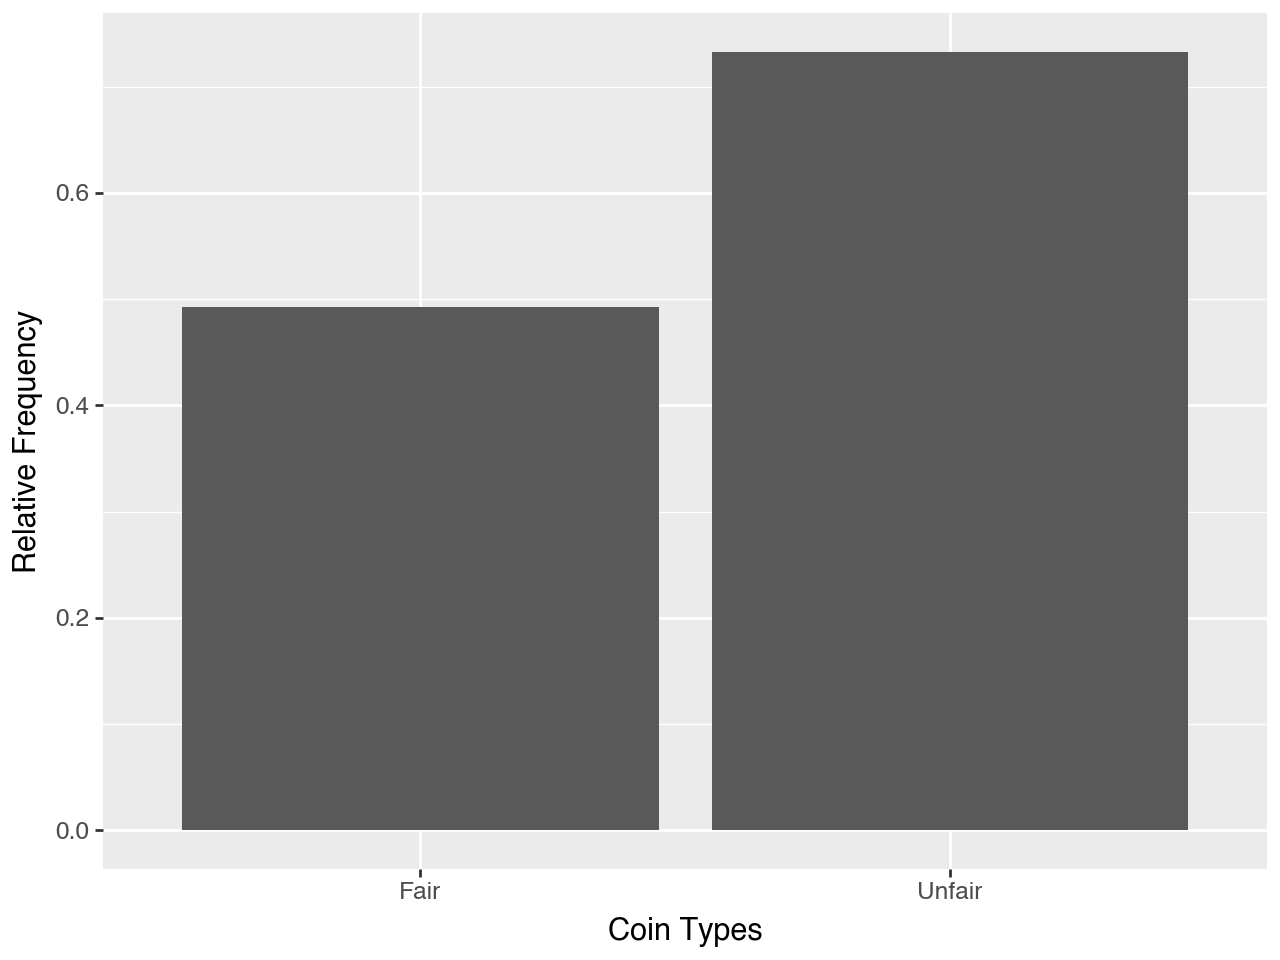

In [17]:
data = pd.DataFrame({
    'Coin Types': ['Fair', 'Unfair'],
    'Relative Frequency': [analyzer_fair.jackpot()/1000, analyzer_unfair.jackpot()/1000]
})

plot = (ggplot(
    data, 
    aes(x = 'Coin Types', y = 'Relative Frequency'))
    + geom_bar(stat = 'identity')
)

print(plot)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [19]:
#creating three dies each having the face 1 through 6
die1 = mt.Die(np.array([1,2,3,4,5,6]))
die2 = mt.Die(np.array([1,2,3,4,5,6]))
die3 = mt.Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [22]:
#making die1 the unfair die and change the face 6's weight to 5
die1.changeweight(6, 5)
die1.printdie()

,faces,weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [25]:
#covnerting dice 2 to be unfair by weighting the face 1 five times more than the others
die2.changeweight(1, 5)
die2.printdie()

,faces,weight
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [26]:
#create a fair dice list 
fair_die_list = [die3, die3, die3, die3, die3]

#initilizing game 
fair_game = mt.Game(fair_die_list)

#playing 1000 flips
fair_game.play(1000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [27]:
#create the unfair die list
unfair_die_list = [die1, die2, die3, die3, die3]

#initilizing game
unfair_game = mt.Game(unfair_die_list)

#playing 1000 flips
unfair_game.play(1000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

/var/folders/c3/4f8z_9w15g7c_d8hpzlnh0840000gn/T/ipykernel_24252/311377786.py:21: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


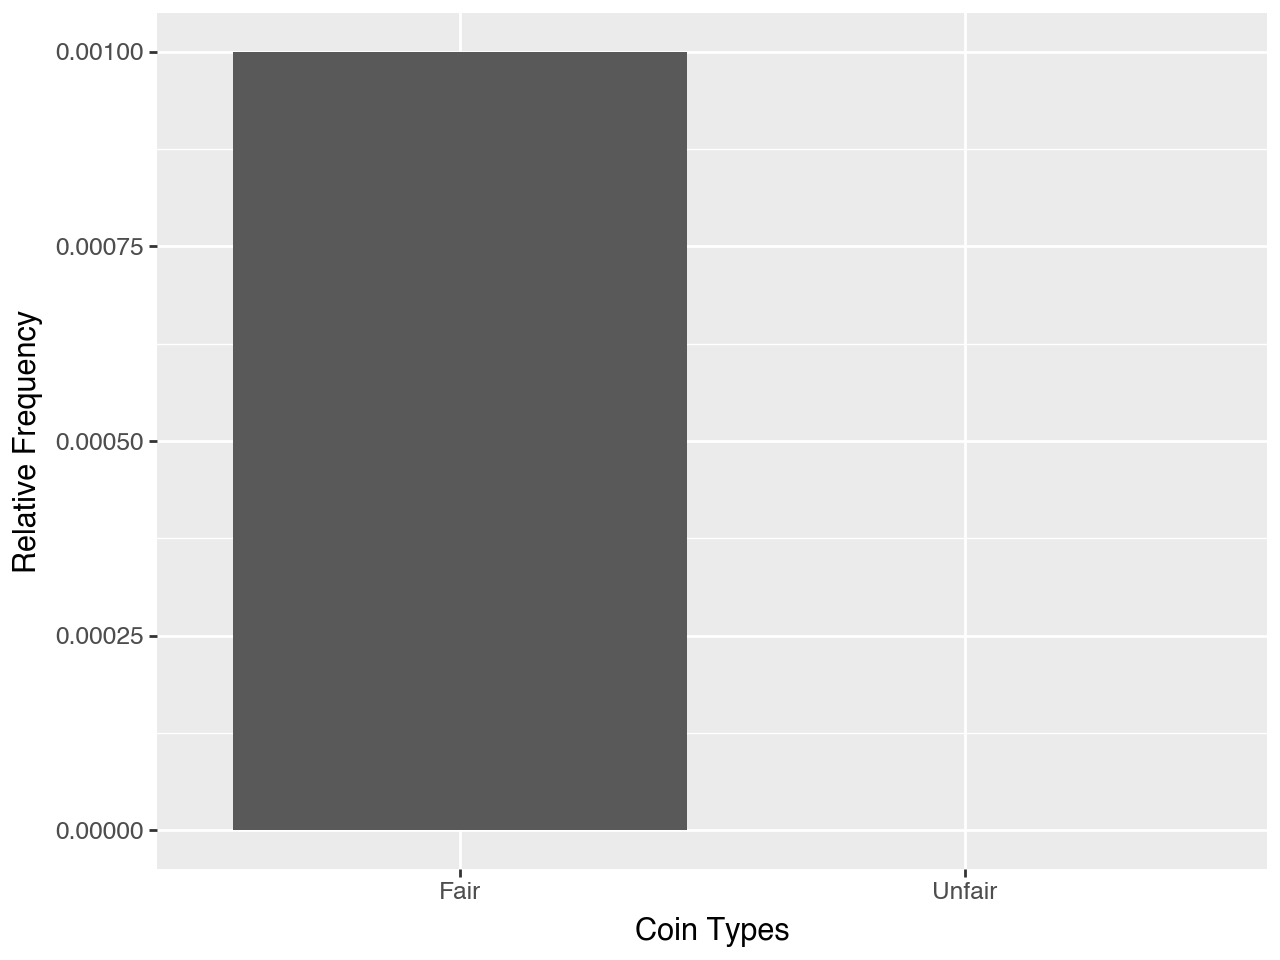

In [34]:
#initilizing the analyzer object for both games
analyzer_fair = mt.Analyzer(fair_game)
analyzer_unfair = mt.Analyzer(unfair_game)

#determine the relative frequency of jacpots
freq_fair = analyzer_fair.jackpot()/1000
freq_unfair = analyzer_unfair.jackpot()/1000

#creating a bar chart comparing the relative frequency of jacpots between fair and unfair games
data = pd.DataFrame({
    'Coin Types': ['Fair', 'Unfair'],
    'Relative Frequency': [freq_fair, freq_unfair]
})

plot = (ggplot(
    data, 
    aes(x = 'Coin Types', y = 'Relative Frequency'))
    + geom_bar(stat = 'identity')
)

print(plot)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [5]:
import numpy as np
import pandas as pd
import montecarlo as mt

#importing the english letters as a dataframe and renaming the columns
english_letters = pd.read_table('english_letters.txt', header=None, sep=' ', names=['letter', 'count'])

#creating faces from the english letters
faces = [english_letters['letter'][i] for i in range(0, len(english_letters))]
faces = np.array(faces)

#creating the die
die = mt.Die(faces)
die.printdie()

#changing weights
for i,weight in enumerate(english_letters['count']):
    die.changeweight(english_letters['letter'][i], weight)

print(die.printdie())

   faces       weight
0      E  529117365.0
1      T  390965105.0
2      A  374061888.0
3      O  326627740.0
4      I  320410057.0
5      N  313720540.0
6      S  294300210.0
7      R  277000841.0
8      H  216768975.0
9      L  183996130.0
10     D  169330528.0
11     C  138416451.0
12     U  117295780.0
13     M  110504544.0
14     F   95422055.0
15     G   91258980.0
16     P   90376747.0
17     W   79843664.0
18     Y   75294515.0
19     B   70195826.0
20     V   46337161.0
21     K   35373464.0
22     J    9613410.0
23     X    8369915.0
24     Z    4975847.0
25     Q    4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [33]:
#creating a die list of 4
die_list = [die, die, die, die]

#initiating game
game = mt.Game(die_list)

#play game 1000 times
game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [42]:
#initiating analyzer
analyzer = mt.Analyzer(game)

#creating a list of scrabble words to compare to
scrabble_words = pd.read_csv("scrabble_words.txt", header=None)
scrabble_words = scrabble_words.values.tolist()
scrabble_words = [sublist[0] for sublist in scrabble_words]

#creating a perm_df to store the permutation counts
perm_df = analyzer.permutation_counts()
test_list = ['YECE', 'TSTE']

#comparing the permutation words to the scrabble words

count = 0 #initilizing the count for words that match
for i in perm_df.index:
    word = ''.join(i) #turning the index into a string that can be compared to scrabble words
    if word in scrabble_words:
        count += perm_df['count'][i]

print(f'there are {count} words that match the scrabble words')

there are 36 words that match the scrabble words


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [44]:
#creating a die list of 5
die_list = [die, die, die,die, die]

#initiating game
game = mt.Game(die_list)

#play game 1000 times
game.play(1000)

#initiating analyzer
analyzer = mt.Analyzer(game)

#creating a list of scrabble words to compare to
scrabble_words = pd.read_csv("scrabble_words.txt", header=None)
scrabble_words = scrabble_words.values.tolist()
scrabble_words = [sublist[0] for sublist in scrabble_words]

#creating a perm_df to store the permutation counts
perm_df = analyzer.permutation_counts()
test_list = ['YECE', 'TSTE']

#comparing the permutation words to the scrabble words

count = 0 #initilizing the count for words that match
for i in perm_df.index:
    word = ''.join(i) #turning the index into a string that can be compared to scrabble words
    if word in scrabble_words:
        count += perm_df['count'][i]

print(f'there are {count} words that match the scrabble words')

there are 13 words that match the scrabble words


Repeating step #nd #3 with 5 dice resulting in 13 words matching compare to 36 words matching when there's 4 dice. The 4 dice produces more